# Panifici
### Contesto
Il dataset appartiene a un panificio francese. Il dataset fornisce i dettagli delle transazioni giornaliere dei clienti dal 01/01/2021 al 30/09/2022.
È possibile osservare le stagionalità annuali e settimanali.

### Contenuto
Il dataset contiene 234005 voci, oltre 136000 transazioni e 6 colonne.

### Variabili
- date: data ordine
- time: ora ordine
- ticket number: identificativo di ogni singola transazione
- article: nome del prodotto venduto (in francese)
- quantity: quantità venduta
- unit_price: prezzo per prodotto

### Obiettivo: prevedere le vendite per facilitare la pianificazione della produzione

In [1]:
import pandas as pd

In [25]:
# Rimuove il primo e l'ultimo " da ogni riga e salva in un nuovo file temporaneo
with open("panifici.csv", "r", encoding="utf-8") as infile, open("panifici_clean.csv", "w", encoding="utf-8") as outfile:
    skip_first_line = True  # per saltare la prima riga se è l'intestazione
    for line in infile:
        if skip_first_line:
            print(line.strip())  # stampa la riga corrente
            skip_first_line = False
            outfile.write(line)
            continue  # salta la prima riga
        if line.startswith('"') and line.endswith('"\n'):
            line = line[1:-2] + "\n"  # rimuove primo e ultimo " e il \n finale
        elif line.startswith('"') and line.endswith('"'):
            line = line[1:-1]
        if len(line.split('""')) == 3:
            line = line.split('""')[0] + line.split('""')[1].replace(',','.').replace(' €','') + line.split('""')[2]
        elif len(line.split('""')) == 5:
            line = line.split('""')[0] + line.split('""')[1].replace(',','.') + line.split('""')[2] + line.split('""')[3].replace(',','.').replace(' €','') + line.split('""')[4]
        else:
            print(f"Formato inatteso per la riga: {line.strip()}")
            continue  # salta le righe che non hanno il formato atteso
        if line.strip():  # evita di scrivere righe vuote
            outfile.write(line)


id,date,time,ticket_number,article,Quantity,unit_price


In [19]:
# stampa la linea 62801 del file pulito
for i, line in enumerate(open("panifici_clean.csv", "r", encoding="utf-8")):
    if i == 62800:  # 62801 è l'indice 62800
        print(line.strip())
        break

137074,2021-07-12,08:27,187149.0,PAIN AUX RAISINS,2.0,1.40


In [27]:
df = pd.read_csv("panifici_clean.csv") #, parse_dates=["date", "time"], dayfirst=True)
# df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
# df["time"] = pd.to_datetime(df["time"], format="%H:%M").dt.time
display(df.head())
print(df.shape)

,id,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


(234005, 7)


In [41]:
# filtra le righe con quantità o prezzo non validi
df = df[(df['Quantity'] > 0) & (df['unit_price'] > 0)]
display(df.head())
print(df.shape)

,id,date,time,ticket_number,article,Quantity,unit_price,total_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,6.00


(232679, 8)


In [43]:
# conta il numero di articoli venduti per ogni prodotto
product_counts = df.groupby('article')['Quantity'].sum().reset_index()
product_counts = product_counts.sort_values(by='Quantity', ascending=False)
print("Numero di articoli venduti per ogni prodotto:")
display(product_counts[product_counts['Quantity'] > 10])

Numero di articoli venduti per ogni prodotto:


,article,Quantity
138,TRADITIONAL BAGUETTE,118093.0
30,CROISSANT,29822.0
83,PAIN AU CHOCOLAT,25367.0
29,COUPE,23601.0
5,BANETTE,22870.0
...,...,...
13,BRIOCHE DE NOEL,19.0
105,PLATPREPARE7.00,17.0
62,GAL POIRE CHOCO 6P,15.0
54,FORMULE PLAT PREPARE,11.0


In [44]:
# crea la colonna 'total_price' e calcola il totale per ogni riga
df['total_price'] = df['Quantity'] * df['unit_price']
display(df.head())

,id,date,time,ticket_number,article,Quantity,unit_price,total_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,6.00


In [47]:
# raggruppa per ticket e calcola il totale delle vendite
ticket_totals = df.groupby('ticket_number')['total_price'].sum().reset_index()
#ticket_totals = ticket_totals.sort_values(by='total_price', ascending=False)
print("Totale delle vendite per ogni ticket:")
display(ticket_totals.head(10))

Totale delle vendite per ogni ticket:


,ticket_number,total_price
0,150040.0,4.50
1,150041.0,3.55
2,150042.0,6.00
3,150043.0,5.10
4,150044.0,1.05
5,150045.0,10.20
6,150046.0,21.00
7,150048.0,3.30
8,150049.0,3.40
9,150050.0,2.40


In [48]:
# raggruppa per data e calcola il totale delle vendite giornaliere
daily_sales = df.groupby('date')['total_price'].sum().reset_index()
daily_sales = daily_sales.sort_values(by='date')
print("Totale delle vendite giornaliere:")
display(daily_sales)

Totale delle vendite giornaliere:


,date,total_price
0,2021-01-02,987.85
1,2021-01-03,1015.20
2,2021-01-04,461.90
3,2021-01-05,526.10
4,2021-01-07,544.00
...,...,...
595,2022-09-26,695.55
596,2022-09-27,769.00
597,2022-09-28,610.70
598,2022-09-29,698.30


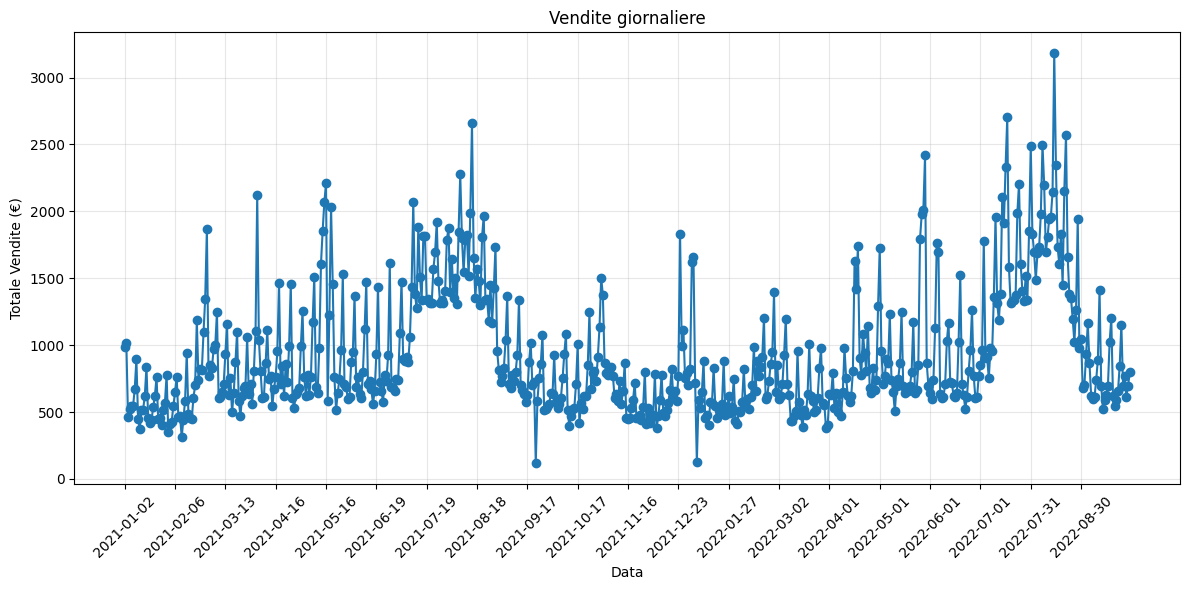

In [57]:
# fai un grafico delle vendite giornaliere
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['total_price'], marker='o')
plt.title('Vendite giornaliere')
plt.xlabel('Data')
plt.ylabel('Totale Vendite (€)')
# mostra solo i tick delle date ogni 30 giorni
plt.xticks(daily_sales['date'][::30], rotation=45)  # mostra ogni 30 date
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()